<b>Import liabraries and load datasets</b>

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Exploratory Data Analysis</b>

In [584]:
data = pd.read_csv('waterQuality1.csv')
pd.set_option('display.max_columns', None)
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [585]:
data.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,0.0,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,0.0,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,0.0,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,0.0,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [586]:
data.shape

(7999, 21)

In [587]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['null'] = data.isnull().sum()
data_info['unik'] = data.nunique()

data_info

,Tipe,null,unik
aluminium,float64,0,495
ammonia,object,0,2564
arsenic,float64,0,107
barium,float64,0,480
cadmium,float64,0,23
chloramine,float64,0,812
chromium,float64,0,91
copper,float64,0,201
flouride,float64,0,151
bacteria,float64,0,101


In [588]:
data.duplicated().sum()

0

In [589]:
data.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.000000,0.666158,1.265145,0.000000,0.040000,0.070000,0.280000,5.050000
arsenic,7999.000000,0.161445,0.252590,0.000000,0.030000,0.050000,0.100000,1.050000
barium,7999.000000,1.567715,1.216091,0.000000,0.560000,1.190000,2.480000,4.940000
cadmium,7999.000000,0.042806,0.036049,0.000000,0.008000,0.040000,0.070000,0.130000
chloramine,7999.000000,2.176831,2.567027,0.000000,0.100000,0.530000,4.240000,8.680000
chromium,7999.000000,0.247226,0.270640,0.000000,0.050000,0.090000,0.440000,0.900000
copper,7999.000000,0.805857,0.653539,0.000000,0.090000,0.750000,1.390000,2.000000
flouride,7999.000000,0.771565,0.435373,0.000000,0.405000,0.770000,1.160000,1.500000
bacteria,7999.000000,0.319665,0.329485,0.000000,0.000000,0.220000,0.610000,1.000000
viruses,7999.000000,0.328583,0.378096,0.000000,0.002000,0.008000,0.700000,1.000000


<b>Data Cleansing</b>

In [590]:
data['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

In [591]:
data['is_safe'] = data['is_safe'].replace('#NUM!', np.nan)
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
data['is_safe'].isnull().sum()

3

In [592]:
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['ammonia'].isnull().sum()

3

In [593]:
data.dropna(subset=['ammonia', 'is_safe'], inplace=True)

<b>Visualization</b>

is_safe
0.0    0.885943
1.0    0.114057
Name: proportion, dtype: float64


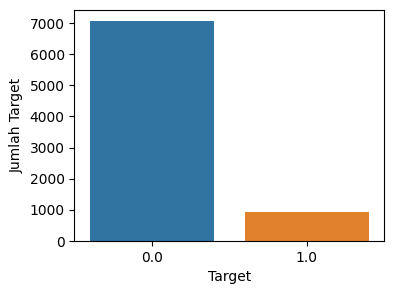

In [594]:
target_distribution = data['is_safe'].value_counts(normalize=True)
print(target_distribution)

plt.figure(figsize=(4, 3))
sns.countplot(x='is_safe', data=data)
plt.xlabel('Target')
plt.ylabel('Jumlah Target')
plt.show()

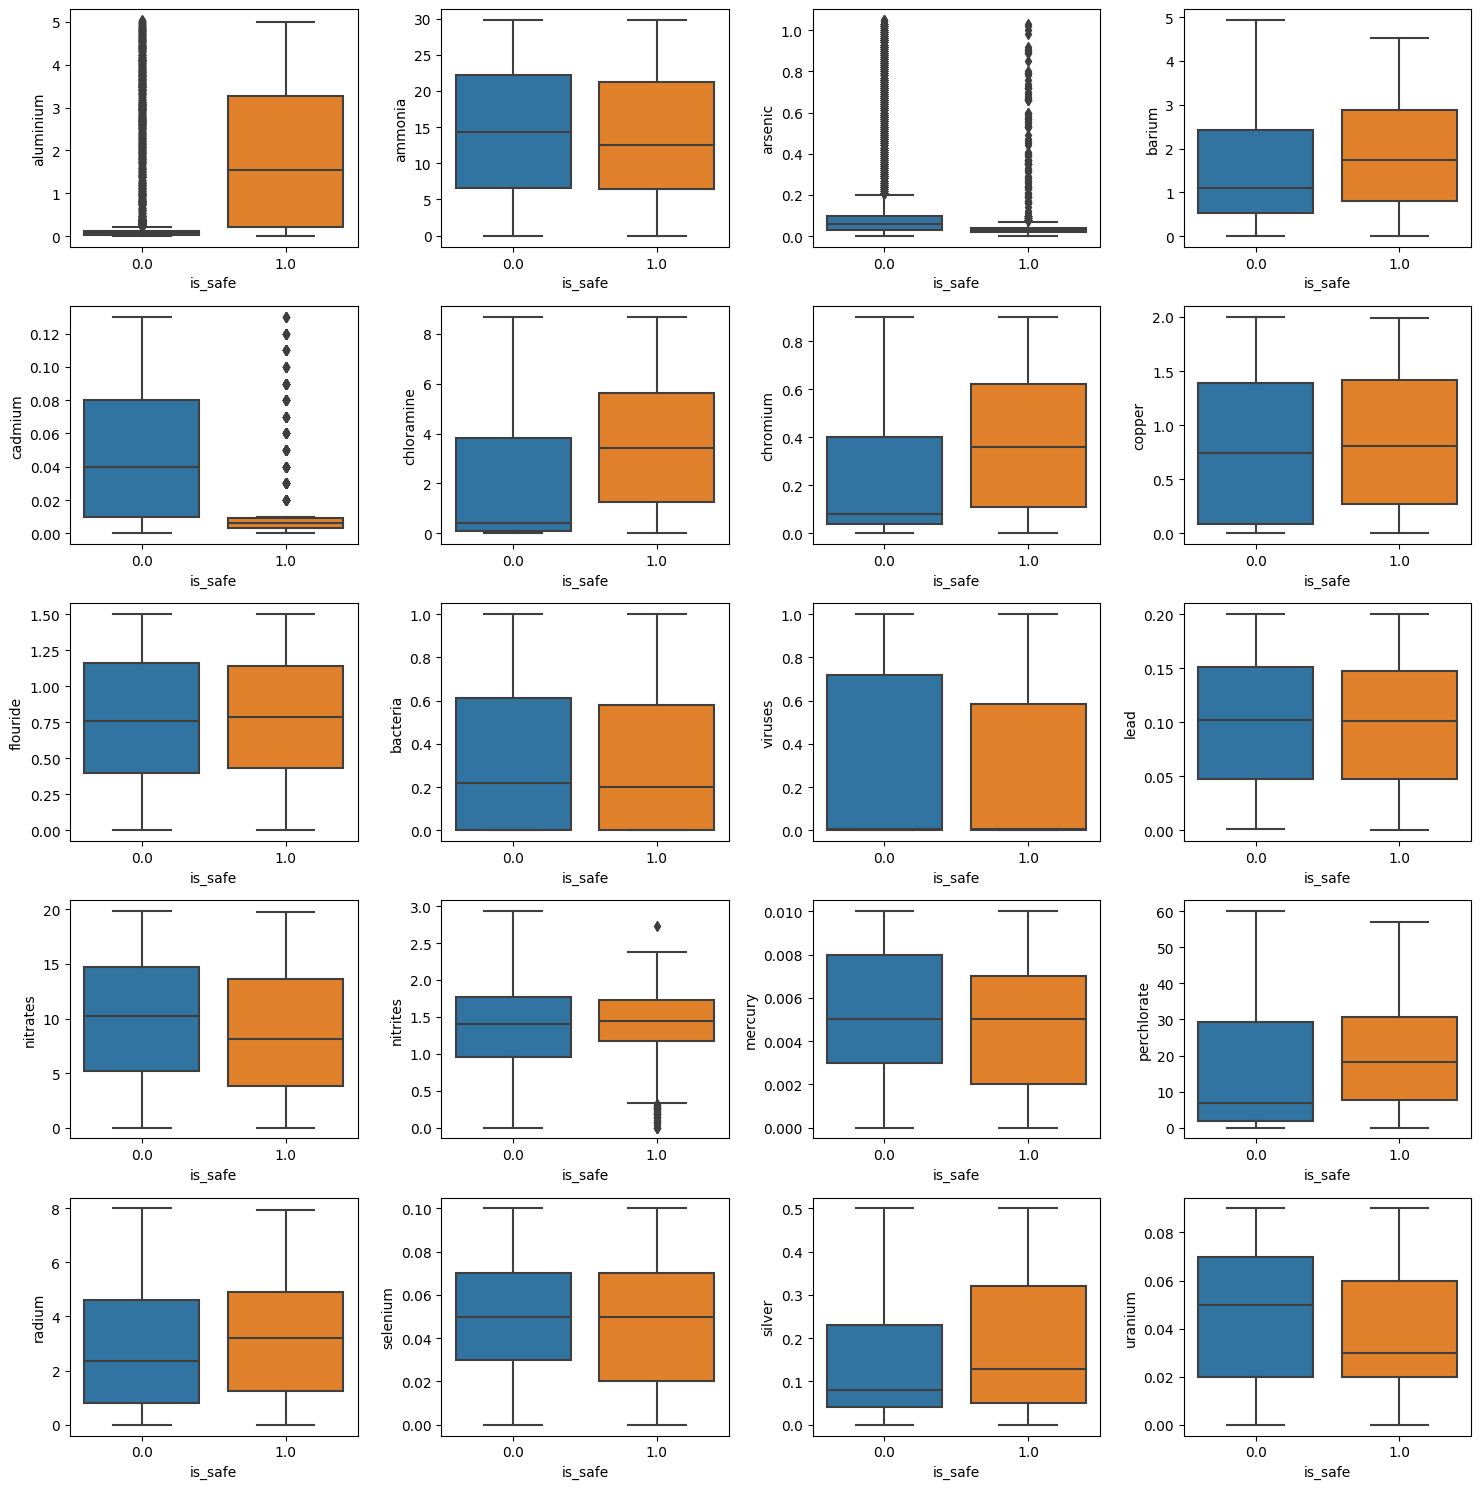

In [595]:
kolom = data.loc[:, data.columns != 'is_safe']

n_features = len(kolom.columns)
ncols = 4 
nrows = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.flatten() 

for i, feature in enumerate(kolom.columns):
    sns.boxplot(x='is_safe', y=feature, data=data, ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<b>Data Preprocessing</b>

In [596]:
num_col = data.columns[data.columns != 'is_safe']

In [597]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['is_safe'] = encoder.fit_transform(data['is_safe'])

In [598]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
for kolom in num_col:
    data[kolom] = norm.fit_transform(data[[kolom]])

In [600]:
X = data.drop(['is_safe'], axis=1)
y = data['is_safe']

In [601]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [602]:
X = np.ascontiguousarray(X, dtype=np.float64)

In [603]:
target_resampled = pd.Series(y).value_counts(normalize=True)
print(target_resampled)

is_safe
1    0.5
0    0.5
Name: proportion, dtype: float64


<b>Modelling (KNN)</b>

In [604]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [605]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [606]:
from sklearn.metrics import accuracy_score

test_pred_knn = model_KNN.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred_knn)
print("Testing Accuracy: ", test_accuracy)

train_pred_knn = model_KNN.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred_knn)
print("Training Accuracy: ", train_accuracy)

Testing Accuracy:  0.9004940014114327
Training Accuracy:  0.9375330862890419


In [607]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [608]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, test_pred_knn)
print("\nAccuracy: ", accuracy)

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, test_pred_knn))

precision = precision_score(y_test, test_pred_knn, average='binary')
print("\nPrecision: ", precision)

recall = recall_score(y_test, test_pred_knn, average='binary')
print("\nRecall: ", recall)

f1 = f1_score(y_test, test_pred_knn, average='binary')  
print("\nF1-Score: ", f1)


Accuracy:  0.9004940014114327

Confusion Matrix: 
[[1141  279]
 [   3 1411]]

Precision:  0.8349112426035503

Recall:  0.9978783592644979

F1-Score:  0.9091494845360825
